In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import trange


#import sys
#sys.path.insert(1, 'y:\\Gihub Repo Work\\Poly_Clust')

import Algorithms.ALG as ALG                   # importing algorithms
import Metrics.GROUND_METRICS as MC_1          # importing lib with Ground metrics - Only for Experimental benchmarking
import Metrics.STANDALONE_METRICS as MC_2      # importing lib with standalone metrics

import Worker.INITIAL_PLOTTER as IPLOT         # Initial Sample plotter
import Worker.FINAL_PLOTTER as FPLOT           # Cluster Sample & result Plotter 

import Worker.DATA_READER as DR                # Data Reader i.e. Path of the scan data

import Worker.MODS as DM                       # Data Operations to be performed 

data, original = DR.reader("W:\\Data PYTHON\\SET_1\\COMBINED") # The path of the AFM scan data is entered here

# Data = reshaped data for clustering
# original = AFM scan data in image matrixformat 


# Performs 1D & 2D Fourier Transform on the Data


# One Dimensional Fourier Transform (INPUT = Original Part from reader())
# Output = Two elements (Columns) (Rows), We are using ROWS for clustering 

ONE_Data = DM.Process_1D_F(original) #ROW WISE

# Two Dimensional Fourier Transform (INPUT = Original Part from reader())
# Output = One elements Transformed Data of AFM scan in 2D Fourier format

TWO_Data = DM.Process_2D_F(original)


GD = np.array([0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
       0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 0, 1, 2])


In [ ]:
GD = np.array([0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
       0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 0, 1, 2])

In [ ]:
0, 1, 2

In [ ]:
0, 1 ,2

In [ ]:
2,1,0

In [4]:
randomlist = [2, 832, 774, 40, 913, 152, 794, 751, 726, 8, 239, 841, 634, 802, 847, 817, 190, 739, 460, 971, 224]

In [8]:

for i in trange(len(randomlist)):
    
    RAND = randomlist[i]
    
    np.random.seed(RAND) 

    T1_A1_G1 = K_MEANS(ONE_Data[1], 3) 
    T1_A2_G1 = K_MEANS_PLUS(ONE_Data[1], 3)
    T1_A3_G1 = K_MEANS_BISECT(ONE_Data[1], 3)
    T1_A7_G1 = HIERARCHY(ONE_Data[1], 3, 0)
    T1_A8_G1 = FUZZY_C(ONE_Data[1], 3)
    T1_A11_G1 = BIRCH(ONE_Data[1], 3)
    T1_A13_G1 = SPECTRAL(ONE_Data[1], 3)

    T1_A4_G2 = DBSCAN_AUTO(ONE_Data[1], 2,2)
    T1_A9_G2 = MEAN_SHIFT(ONE_Data[1], 3)
    T1_A10_G2 = AFFINITY(ONE_Data[1],0.5)

    T1_A5_G2 = DBSCAN_MANUAL(ONE_Data[1],1.29,2)
    T1_A6_G2 = HDBSCAN_MANUAL(ONE_Data[1],6,2,475) #5,3,475) #HDBSCAN_MANUAL
    T1_A12_G2 = OPTICS_AUTO(ONE_Data[1], 8) 


    #---------------------------------------------------------------------------------------------------------------------------------------
    T1_A1_G1_M1 =  MC_1.Metric_1(GD, T1_A1_G1[1],"K MEANS")
    T1_A2_G1_M1 =  MC_1.Metric_1(GD, T1_A2_G1[1],"K MEANS++")
    T1_A3_G1_M1 =  MC_1.Metric_1(GD, T1_A3_G1[1],"K MEANS BISECT")
    T1_A7_G1_M1 =  MC_1.Metric_1(GD, T1_A7_G1[1],"HIERARCHY")
    T1_A8_G1_M1 =  MC_1.Metric_1(GD, T1_A8_G1[1],"FUZZY_C")
    T1_A11_G1_M1 =  MC_1.Metric_1(GD, T1_A11_G1[1],"BIRCH")
    T1_A13_G1_M1 =  MC_1.Metric_1(GD, T1_A13_G1[1],"SPECTRAL")

    T1_A4_G2_M1 =  MC_1.Metric_1(GD, T1_A4_G2[1],"DBSCAN AUTO")
    T1_A9_G2_M1 =  MC_1.Metric_1(GD, T1_A9_G2[1],"MEAN SHIFT")
    T1_A10_G2_M1 =  MC_1.Metric_1(GD, T1_A10_G2[1],"AFFINITY")

    T1_A5_G2_M1 =  MC_1.Metric_1(GD, T1_A5_G2[1],"DBSCAN MANUAL")
    T1_A6_G2_M1 =  MC_1.Metric_1(GD, T1_A6_G2[1],"HDBSCAN MANUAL")
    T1_A12_G2_M1 =  MC_1.Metric_1(GD, T1_A12_G2[1],"OPTICS AUTO")

    T1_Final_1_M1 = pd.concat([T1_A1_G1_M1[1], T1_A2_G1_M1[1], T1_A3_G1_M1[1], T1_A7_G1_M1[1], T1_A8_G1_M1[1], T1_A11_G1_M1[1], T1_A13_G1_M1[1]])
    T1_Final_2_M1 = pd.concat([T1_A4_G2_M1[1], T1_A9_G2_M1[1], T1_A10_G2_M1[1]])
    T1_Final_3_M1 = pd.concat([T1_A5_G2_M1[1], T1_A6_G2_M1[1], T1_A12_G2_M1[1]]) 

    DA_A_G = pd.concat([T1_Final_1_M1,T1_Final_2_M1,T1_Final_3_M1])
    DA_A_G.columns = pd.MultiIndex.from_product([[" Ground Truth Metrics "], DA_A_G.columns])
    DA_A_G.style.set_table_attributes("style='display:inline'").set_caption('Performance of Algorithms using AFM Height Data via Ground Truth Metrics')
    #---------------------------------------------------------------------------------------------------------------------------------------
    T1_A1_G1_M2 =  MC_2.Metric_2(ONE_Data[1], T1_A1_G1[1],"K MEANS")
    T1_A2_G1_M2 =  MC_2.Metric_2(ONE_Data[1], T1_A2_G1[1],"K MEANS++")
    T1_A3_G1_M2 =  MC_2.Metric_2(ONE_Data[1], T1_A3_G1[1],"K MEANS BISECT")
    T1_A7_G1_M2 =  MC_2.Metric_2(ONE_Data[1], T1_A7_G1[1],"HIERARCHY")
    T1_A8_G1_M2 =  MC_2.Metric_2(ONE_Data[1], T1_A8_G1[1],"FUZZY_C")
    T1_A11_G1_M2 =  MC_2.Metric_2(ONE_Data[1], T1_A11_G1[1],"BIRCH")
    T1_A13_G1_M2 =  MC_2.Metric_2(ONE_Data[1], T1_A13_G1[1],"SPECTRAL")

    T1_A4_G2_M2 =  MC_2.Metric_2(ONE_Data[1], T1_A4_G2[1],"DBSCAN AUTO")
    T1_A9_G2_M2 =  MC_2.Metric_2(ONE_Data[1], T1_A9_G2[1],"MEAN SHIFT")
    T1_A10_G2_M2 =  MC_2.Metric_2(ONE_Data[1], T1_A10_G2[1],"AFFINITY") 

    T1_A5_G2_M2 =  MC_2.Metric_2(ONE_Data[1], T1_A5_G2[1],"DBSCAN MANUAL")
    T1_A6_G2_M2 =  MC_2.Metric_2(ONE_Data[1], (T1_A6_G2[1]+1),"HDBSCAN MANUAL")
    T1_A12_G2_M2 =  MC_2.Metric_2(ONE_Data[1], T1_A12_G2[1],"OPTICS AUTO")


    T1_Final_1_M2 = pd.concat([T1_A1_G1_M2[1], T1_A2_G1_M2[1], T1_A3_G1_M2[1], T1_A7_G1_M2[1], T1_A8_G1_M2[1], T1_A13_G1_M2[1]])#T1_A11_G1_M2[1], 
    T1_Final_2_M2 = pd.concat([T1_A4_G2_M2[1], T1_A9_G2_M2[1], T1_A10_G2_M2[1]])
    T1_Final_3_M2 = pd.concat([T1_A5_G2_M2[1], T1_A6_G2_M2[1], T1_A12_G2_M2[1]]) #

    DA_A_NG = pd.concat([T1_Final_1_M2,T1_Final_2_M2,T1_Final_3_M2])
    DA_A_NG.columns = pd.MultiIndex.from_product([["Non-Ground Truth Metrics"], DA_A_NG.columns])
    DA_A_NG.style.set_table_attributes("style='display:inline'").set_caption('Performance of Algorithms using 2D Fourier Transformed Data via Ground Truth Metrics')

    #---------------------------------------------------------------------------------------------------------------------------------------
    FULL_RAW = pd.concat([DA_A_G,DA_A_NG], axis = 1)
    FULL_RAW.to_csv("ONE_D_FULL_TABLE_RST-"+str(randomlist[i]) +".csv")


  0%|          | 0/21 [00:00<?, ?it/s]c:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory le

In [120]:
FULL_RAW.to_csv("ONE_DATA.csv")

In [115]:
  
FILE_PATH = "W:\Data PYTHON\SET_1\COMBINED\TWO_D" # W:\\Import 14\\JPG

# Change Directory of the Kernel
os.chdir(FILE_PATH)
#os.getcwd()

# Storing the Path of each file within the Folder
file_paths = []    

# Checking if all files are JPG or not, Read only JPG files
for file in os.listdir(): 
    if file.endswith(".csv"):
        file_paths.append(f"{FILE_PATH}\{file}")   

# A Dictionary to store the Path of each File with an ID Number (assigned from 0 - max)
a = {}  
k = 0
for ele in file_paths:
    a[k] = ele
    k+=1
    
    

In [116]:
a

{0: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-152.csv',
 1: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-190.csv',
 2: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-2.csv',
 3: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-224.csv',
 4: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-239.csv',
 5: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-40.csv',
 6: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-460.csv',
 7: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-634.csv',
 8: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-726.csv',
 9: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-739.csv',
 10: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-751.csv',
 11: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-774.csv',
 12: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-794.csv',

In [ ]:
MAX = pd.read_csv(a[0], index_col = 'Unnamed: 0', header = 1)

for i in range(1, len(a)):
   
    COMP = pd.read_csv(a[i], index_col = 'Unnamed: 0', header = 1)

    R1 = list(pd.read_csv(a[i], index_col = 'Unnamed: 0', header = 1).columns[0:])
    R2 = list(pd.read_csv(a[i], index_col = 'Unnamed: 0', header = 1).index[0:])
    for aa in range(len(R1)):
        for bb in range(len(R2)):
            if COMP[R1[aa]][R2[bb]] >= MAX[R1[aa]][R2[bb]]:
                MAX[R1[aa]][R2[bb]] = COMP[R1[aa]][R2[bb]]

print("File NUmber", a)

MAX.to_csv("TWO_DATA_MAX.csv")

In [117]:
MAX = pd.read_csv(a[0], index_col = 'Unnamed: 0', header = 1)

for i in range(1, len(a)):
   
    COMP = pd.read_csv(a[i], index_col = 'Unnamed: 0', header = 1)

    R1 = list(pd.read_csv(a[i], index_col = 'Unnamed: 0', header = 1).columns[0:])
    R2 = list(pd.read_csv(a[i], index_col = 'Unnamed: 0', header = 1).index[0:])
    for aa in range(len(R1)):
        for bb in range(len(R2)):
            if COMP[R1[aa]][R2[bb]] >= MAX[R1[aa]][R2[bb]]:
                MAX[R1[aa]][R2[bb]] = COMP[R1[aa]][R2[bb]]

print("File NUmber", a)

MAX.to_csv("TWO_DATA_MAX.csv")

File NUmber {0: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-152.csv', 1: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-190.csv', 2: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-2.csv', 3: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-224.csv', 4: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-239.csv', 5: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-40.csv', 6: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-460.csv', 7: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-634.csv', 8: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-726.csv', 9: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-739.csv', 10: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-751.csv', 11: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-774.csv', 12: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-794.csv',

In [118]:
MIN = pd.read_csv(a[0], index_col = 'Unnamed: 0', header = 1)

for i in range(1, len(a)):
   
    COMP = pd.read_csv(a[i], index_col = 'Unnamed: 0', header = 1)

    R1 = list(pd.read_csv(a[i], index_col = 'Unnamed: 0', header = 1).columns[0:])
    R2 = list(pd.read_csv(a[i], index_col = 'Unnamed: 0', header = 1).index[0:])
    for aa in range(len(R1)):
        for bb in range(len(R2)):
            if COMP[R1[aa]][R2[bb]] <= MIN[R1[aa]][R2[bb]]:
                MIN[R1[aa]][R2[bb]] = COMP[R1[aa]][R2[bb]]

print("File NUmber", a)

MIN.to_csv("TWO_DATA_MIN.csv")

File NUmber {0: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-152.csv', 1: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-190.csv', 2: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-2.csv', 3: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-224.csv', 4: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-239.csv', 5: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-40.csv', 6: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-460.csv', 7: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-634.csv', 8: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-726.csv', 9: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-739.csv', 10: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-751.csv', 11: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-774.csv', 12: 'W:\\Data PYTHON\\SET_1\\COMBINED\\TWO_D\\TWO_D_FULL_TABLE_RST-794.csv',

# AVERAGEER

In [163]:
  
FILE_PATH = "W:\Data PYTHON\SET_1\COMBINED\ONE_D" # W:\\Import 14\\JPG

# Change Directory of the Kernel
os.chdir(FILE_PATH)
#os.getcwd()

# Storing the Path of each file within the Folder
file_paths = []    

# Checking if all files are JPG or not, Read only JPG files
for file in os.listdir(): 
    if file.endswith(".csv"):
        file_paths.append(f"{FILE_PATH}\{file}")   

# A Dictionary to store the Path of each File with an ID Number (assigned from 0 - max)
a = {}  
k = 0
for ele in file_paths:
    a[k] = ele
    k+=1
    
    

In [164]:
AVG = pd.read_csv(a[0], index_col = 'Unnamed: 0', header = 1)

for i in range(1, len(a)):
   
    COMP = pd.read_csv(a[i], index_col = 'Unnamed: 0', header = 1)

    R1 = list(pd.read_csv(a[i], index_col = 'Unnamed: 0', header = 1).columns[0:])
    R2 = list(pd.read_csv(a[i], index_col = 'Unnamed: 0', header = 1).index[0:])
    for aa in range(len(R1)):
        for bb in range(len(R2)):
            AVG[R1[aa]][R2[bb]] = AVG[R1[aa]][R2[bb]] + COMP[R1[aa]][R2[bb]]


print("File NUmber", a)
AVG = AVG/21

AVG.round(decimals=2).to_csv("ONE_DATA_AVG.csv")

File NUmber {0: 'W:\\Data PYTHON\\SET_1\\COMBINED\\ONE_D\\ONE_D_FULL_TABLE_RST-152.csv', 1: 'W:\\Data PYTHON\\SET_1\\COMBINED\\ONE_D\\ONE_D_FULL_TABLE_RST-190.csv', 2: 'W:\\Data PYTHON\\SET_1\\COMBINED\\ONE_D\\ONE_D_FULL_TABLE_RST-2.csv', 3: 'W:\\Data PYTHON\\SET_1\\COMBINED\\ONE_D\\ONE_D_FULL_TABLE_RST-224.csv', 4: 'W:\\Data PYTHON\\SET_1\\COMBINED\\ONE_D\\ONE_D_FULL_TABLE_RST-239.csv', 5: 'W:\\Data PYTHON\\SET_1\\COMBINED\\ONE_D\\ONE_D_FULL_TABLE_RST-40.csv', 6: 'W:\\Data PYTHON\\SET_1\\COMBINED\\ONE_D\\ONE_D_FULL_TABLE_RST-460.csv', 7: 'W:\\Data PYTHON\\SET_1\\COMBINED\\ONE_D\\ONE_D_FULL_TABLE_RST-634.csv', 8: 'W:\\Data PYTHON\\SET_1\\COMBINED\\ONE_D\\ONE_D_FULL_TABLE_RST-726.csv', 9: 'W:\\Data PYTHON\\SET_1\\COMBINED\\ONE_D\\ONE_D_FULL_TABLE_RST-739.csv', 10: 'W:\\Data PYTHON\\SET_1\\COMBINED\\ONE_D\\ONE_D_FULL_TABLE_RST-751.csv', 11: 'W:\\Data PYTHON\\SET_1\\COMBINED\\ONE_D\\ONE_D_FULL_TABLE_RST-774.csv', 12: 'W:\\Data PYTHON\\SET_1\\COMBINED\\ONE_D\\ONE_D_FULL_TABLE_RST-794.csv',

# STD DEV

In [252]:
  
FILE_PATH = "W:\Data PYTHON\SET_1\COMBINED\RAW_D" # W:\\Import 14\\JPG

# Change Directory of the Kernel
os.chdir(FILE_PATH)
#os.getcwd()

# Storing the Path of each file within the Folder
file_paths = []    

# Checking if all files are JPG or not, Read only JPG files
for file in os.listdir(): 
    if file.endswith(".csv"):
        file_paths.append(f"{FILE_PATH}\{file}")   

# A Dictionary to store the Path of each File with an ID Number (assigned from 0 - max)
a = {}  
k = 0
for ele in file_paths:
    a[k] = ele
    k+=1
    
    

In [253]:
a

{0: 'W:\\Data PYTHON\\SET_1\\COMBINED\\RAW_D\\FULL_TABLE_RST-152.csv',
 1: 'W:\\Data PYTHON\\SET_1\\COMBINED\\RAW_D\\FULL_TABLE_RST-190.csv',
 2: 'W:\\Data PYTHON\\SET_1\\COMBINED\\RAW_D\\FULL_TABLE_RST-2.csv',
 3: 'W:\\Data PYTHON\\SET_1\\COMBINED\\RAW_D\\FULL_TABLE_RST-224.csv',
 4: 'W:\\Data PYTHON\\SET_1\\COMBINED\\RAW_D\\FULL_TABLE_RST-239.csv',
 5: 'W:\\Data PYTHON\\SET_1\\COMBINED\\RAW_D\\FULL_TABLE_RST-40.csv',
 6: 'W:\\Data PYTHON\\SET_1\\COMBINED\\RAW_D\\FULL_TABLE_RST-460.csv',
 7: 'W:\\Data PYTHON\\SET_1\\COMBINED\\RAW_D\\FULL_TABLE_RST-634.csv',
 8: 'W:\\Data PYTHON\\SET_1\\COMBINED\\RAW_D\\FULL_TABLE_RST-726.csv',
 9: 'W:\\Data PYTHON\\SET_1\\COMBINED\\RAW_D\\FULL_TABLE_RST-739.csv',
 10: 'W:\\Data PYTHON\\SET_1\\COMBINED\\RAW_D\\FULL_TABLE_RST-751.csv',
 11: 'W:\\Data PYTHON\\SET_1\\COMBINED\\RAW_D\\FULL_TABLE_RST-774.csv',
 12: 'W:\\Data PYTHON\\SET_1\\COMBINED\\RAW_D\\FULL_TABLE_RST-794.csv',
 13: 'W:\\Data PYTHON\\SET_1\\COMBINED\\RAW_D\\FULL_TABLE_RST-8.csv',
 14: 'W

In [254]:
import statistics as st

STD = pd.read_csv(a[0], index_col = 'Unnamed: 0', header = 1)
SS = []

R1 = list(pd.read_csv(a[0], index_col = 'Unnamed: 0', header = 1).columns[0:])
R2 = list(pd.read_csv(a[0], index_col = 'Unnamed: 0', header = 1).index[0:])

for aa in range(len(R1)):

    for bb in range(len(R2)):

        for i in range(0,len(a)):

            COMP = pd.read_csv(a[i], index_col = 'Unnamed: 0', header = 1)
            
            SS.append(COMP[R1[aa]][R2[bb]])
        
        print(SS)
        STD[R1[aa]][R2[bb]] = st.pstdev(SS)      #SS[R1[aa]][R2[bb]] + COMP[R1[aa]][R2[bb]]
        SS = []
        print("/n/n")

[66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06]
/n/n
[66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06, 66.06]
/n/n
[66.06, 62.14, 66.06, 66.14, 68.78, 68.63, 66.52, 63.8, 66.06, 66.06, 66.97, 66.52, 68.93, 66.06, 66.21, 66.52, 66.06, 67.57, 68.33, 63.8, 67.57]
/n/n
[69.98, 69.98, 69.98, 69.98, 69.98, 69.98, 69.98, 69.98, 69.98, 69.98, 69.98, 69.98, 69.98, 69.98, 69.98, 69.98, 69.98, 69.98, 69.98, 69.98, 69.98]
/n/n
[68.63, 68.63, 68.63, 68.63, 68.63, 68.63, 69.53, 68.63, 68.63, 68.63, 68.63, 68.63, 68.63, 68.63, 68.63, 68.63, 68.63, 68.63, 68.63, 68.63, 68.63]
/n/n
[32.05, 32.05, 32.05, 32.05, 32.05, 32.05, 32.05, 32.05, 32.05, 32.05, 32.05, 32.05, 32.05, 32.05, 32.05, 32.05, 32.05, 32.05, 32.05, 32.05, 32.05]
/n/n
[65.31, 65.31, 60.18, 68.93, 68.93, 61.54, 60.18, 68.55, 64.56, 64.56, 67.42, 68.17,

In [245]:
STD# 2D

,Rand_Index,Adj_Rand_Index,MMI,Homogeneity,Completness,V Measure,Geometric Mean,Silhouette_Score,Calinski_Harabasz_Score,Davies_Bouldin_Score
K MEANS,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
K MEANS++,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
K MEANS BISECT,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HIERARCHY,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FUZZY_C,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BIRCH,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
SPECTRAL,0.83454,1.8338,2.006441,1.922425,1.946052,1.935066,1.295083,0.006281,0.317979,0.604818
DBSCAN AUTO,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MEAN SHIFT,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AFFINITY,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [251]:
STD #1d

,Rand_Index,Adj_Rand_Index,MMI,Homogeneity,Completness,V Measure,Geometric Mean,Silhouette_Score,Calinski_Harabasz_Score,Davies_Bouldin_Score
K MEANS,0.564359,1.308514,0.888990,0.844041,0.879002,0.864019,0.898979,0.000000,0.024972,0.004994
K MEANS++,0.564359,1.308514,0.888990,0.844041,0.879002,0.864019,0.898979,0.000000,0.024972,0.004994
K MEANS BISECT,1.814033,4.883540,8.506815,6.958242,9.697625,8.233072,3.851897,0.033564,0.997124,0.046817
HIERARCHY,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FUZZY_C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BIRCH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
SPECTRAL,0.565454,1.327247,1.123055,1.009179,1.158396,1.083788,0.926717,0.000000,0.616502,0.000000
DBSCAN AUTO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MEAN SHIFT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AFFINITY,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [255]:
STD #RAW

,Rand_Index,Adj_Rand_Index,MMI,Homogeneity,Completness,V Measure,Geometric Mean,Silhouette_Score,Calinski_Harabasz_Score,Davies_Bouldin_Score
K MEANS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
K MEANS++,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
K MEANS BISECT,1.637749,2.484781,3.587615,3.775677,3.541744,3.366967,1.932427,0.021581,2.178835,0.393375
HIERARCHY,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FUZZY_C,0.191663,0.379067,0.270458,0.281106,0.227866,0.255551,0.219348,0.002130,0.112868,0.012778
BIRCH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
SPECTRAL,3.342218,6.413110,3.134756,2.969593,3.158874,3.019518,3.822772,0.014302,1.323571,0.202952
DBSCAN AUTO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MEAN SHIFT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AFFINITY,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [207]:
FULL_2D = pd.read_csv("W:\Data PYTHON\SET_1\COMBINED\TWO_D\TWO_DATA_AVG.csv")#, index_col = 'Unnamed: 0', header = 1)
FULL_1D = pd.read_csv("W:\Data PYTHON\SET_1\COMBINED\ONE_D\ONE_DATA_AVG.csv")#, index_col = 'Unnamed: 0', header = 1)
FULL_RAW = pd.read_csv("W:\Data PYTHON\SET_1\COMBINED\RAW_D\RAW_DATA_AVG.csv")#, index_col = 'Unnamed: 0', header = 1)

DG_2 = []
DG_1 = []
DG_R = []

for i in range(len(list(FULL_2D[FULL_2D.columns[1]]))):
    DG_2.append(float(list(FULL_2D[FULL_2D.columns[1]])[i]))
    DG_1.append(float(list(FULL_1D[FULL_1D.columns[1]])[i]))
    DG_R.append(float(list(FULL_RAW[FULL_RAW.columns[1]])[i]))

In [210]:
STD_FULL_2D = pd.read_csv("W:\Data PYTHON\SET_1\COMBINED\TWO_D\TWO_DATA_STD.csv")#, index_col = 'Unnamed: 0', header = 1)
STD_FULL_1D = pd.read_csv("W:\Data PYTHON\SET_1\COMBINED\ONE_D\ONE_DATA_STD.csv")#, index_col = 'Unnamed: 0', header = 1)
STD_FULL_RAW = pd.read_csv("W:\Data PYTHON\SET_1\COMBINED\RAW_D\RAW_DATA_STD.csv")#, index_col = 'Unnamed: 0', header = 1)

STD_DG_2 = []
STD_DG_1 = []
STD_DG_R = []

for i in range(len(list(STD_FULL_2D[STD_FULL_2D.columns[1]]))):
    STD_DG_2.append(float(list(STD_FULL_2D[STD_FULL_2D.columns[1]])[i]))
    STD_DG_1.append(float(list(STD_FULL_1D[STD_FULL_1D.columns[1]])[i]))
    STD_DG_R.append(float(list(STD_FULL_RAW[STD_FULL_RAW.columns[1]])[i]))

In [237]:
DG_1

[82.44,
 82.44,
 77.73,
 80.92,
 83.03,
 85.75,
 84.58,
 80.69,
 74.66,
 76.24,
 77.98,
 76.92,
 85.52]

In [238]:
STD_DG_1

[83.03,
 83.03,
 75.79,
 80.92,
 83.03,
 85.75,
 84.31,
 80.69,
 74.66,
 76.24,
 77.98,
 76.92,
 3.38]

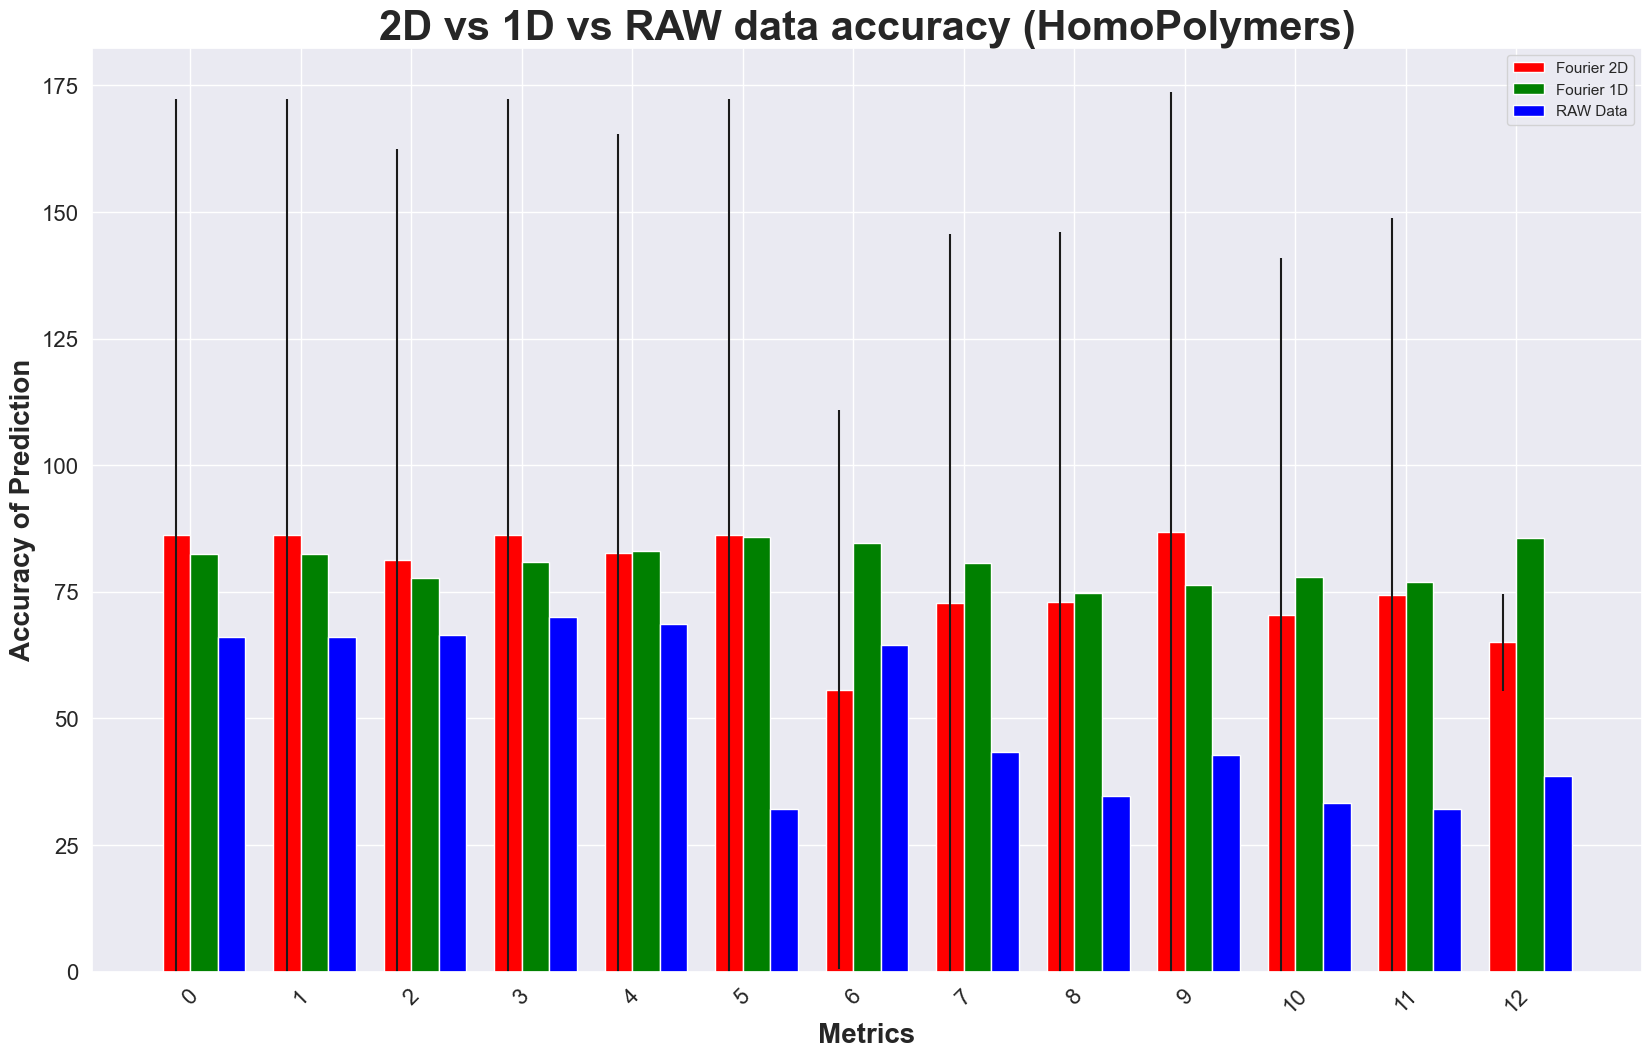

In [236]:

N = 13
ind = np.arange(N)
width = 0.25
fig = plt.figure(figsize=(20, 12), dpi = 100) # Size & DPI of Plot

xvals = DG_2
bar1 = plt.bar(ind, xvals, width, yerr = STD_DG_2,color = 'red')

yvals = DG_1
bar2 = plt.bar(ind+width, yvals, width, color='green')

zvals = DG_R
bar3 = plt.bar(ind+width*2, zvals, width, color = 'blue')

plt.xlabel("Metrics", fontweight = 'bold', fontsize = 20)
plt.ylabel("Accuracy of Prediction",fontweight='bold',fontsize = 20)
plt.title("2D vs 1D vs RAW data accuracy (HomoPolymers)",fontweight='bold',fontsize = 30)

plt.xticks(ind + width/2, FULL_2D.index, rotation = 45, fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend( (bar1, bar2, bar3), ('Fourier 2D', 'Fourier 1D', 'RAW Data') )
#plt.ylim(-5,105)
plt.savefig("Accuracy Comparison",bbox_inches='tight')
plt.show()


In [1]:
# A_1 = K_MEANS
# A_2 = K_MEANS_PLUS
# A_3 = K_MEANS_BISECT
# A_4 = DBSCAN_AUTO
# A_5 = DBSCAN_MANUAL
# A_6 = HDBSCAN
# A_7 = HIERARCHY
# A_8 = FUZZY_C
# A_9 = MEAN_SHIFT
# A_10 = AFFINITY
# A_11 = BIRCH
# A_12 = OPTICS
# A_13 = SPECTRAL
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from skimage.io import imread, imshow

# Presets for Plots 
sns.set(style="darkgrid")
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

import numpy as np 
from sklearn.cluster import KMeans
from sklearn.cluster import BisectingKMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
from kneed import KneeLocator
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import Birch
from sklearn.cluster import MeanShift
from fcmeans import FCM
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import os
from sklearn.cluster import HDBSCAN

        

#------------------------------------------------------------------------------------------------------------------------------------------

# This function performs Clustering on the Data; 



# have to make A bigger selection menu for types of data Input: 
# 1. 

def K_MEANS(input_data, cluster):   # The Function requires input Data in the format of (Data, Number of Clusters) 
    # Note: the Data should be read from Datareader or should be converted to the format of (Number of elements, Dimension in 1D) as an array. e.g. If there are 20 files of data with dimensions of 256*256, the Input should be given in theform of 20 files with 1Dimension of 65,536

    # K_Means algorithm
    Kmean = KMeans(n_clusters = cluster, random_state = RAND)#, n_init = 100)
    
    # Fitting It to the Data
    Kmean.fit(input_data)
    
    # A Dictionary to Store the Cluster IDs & the Respective Data with IDs
    kk = {}
    temp = []

    # Creating the Key for the number of Clusters as mentioned
    for k in range(cluster):
        kk[k] = []

    # Stores the Cluster ID's for Reference & Assignment 
    tt = list(kk.keys())

    # Assigning Data elements to their respective Clusters 
    for t in range(len(tt)):
        for i in range(len(Kmean.labels_)):
            if Kmean.labels_[i] == tt[t]:
                kk[t]+=[i]

    # Returning a Dictionary with The Number of Clusters and respective Elements within
    return kk, Kmean.labels_


#------------------------------------------------------------------------------------------------------------------------------------------

# This function performs Clustering on the Data; 



# have to make A bigger selection menu for types of data Input: 
# 1. 

def K_MEANS_PLUS(input_data, cluster):   # The Function requires input Data in the format of (Data, Number of Clusters) 
    # Note: the Data should be read from Datareader or should be converted to the format of (Number of elements, Dimension in 1D) as an array. e.g. If there are 20 files of data with dimensions of 256*256, the Input should be given in theform of 20 files with 1Dimension of 65,536

    # K_Means algorithm
    Kmean = KMeans(n_clusters = cluster, init = 'k-means++', random_state=RAND)#, n_init = 100)
    
    # Fitting It to the Data
    Kmean.fit(input_data)
    
    # A Dictionary to Store the Cluster IDs & the Respective Data with IDs
    kk = {}
    temp = []

    # Creating the Key for the number of Clusters as mentioned
    for k in range(cluster):
        kk[k] = []

    # Stores the Cluster ID's for Reference & Assignment 
    tt = list(kk.keys())

    # Assigning Data elements to their respective Clusters 
    for t in range(len(tt)):
        for i in range(len(Kmean.labels_)):
            if Kmean.labels_[i] == tt[t]:
                kk[t]+=[i]

    # Returning a Dictionary with The Number of Clusters and respective Elements within
    return kk, Kmean.labels_
#------------------------------------------------------------------------------------------------------------------------------------------



# This function performs Clustering on the Data; 



def K_MEANS_BISECT(input_data, cluster):   # The Function requires input Data in the format of (Data, Number of Clusters) 
    # Note: the Data should be read from Datareader or should be converted to the format of (Number of elements, Dimension in 1D) as an array. e.g. If there are 20 files of data with dimensions of 256*256, the Input should be given in theform of 20 files with 1Dimension of 65,536

    # K_Means algorithm
    Kmean_BISECT = BisectingKMeans(n_clusters = cluster,init = 'k-means++', random_state=RAND)#, n_init = 100)
    
    # Fitting It to the Data
    Kmean_BISECT.fit(input_data)
    
    # A Dictionary to Store the Cluster IDs & the Respective Data with IDs
    kk = {}
    temp = []

    # Creating the Key for the number of Clusters as mentioned
    for k in range(cluster):
        kk[k] = []

    # Stores the Cluster ID's for Reference & Assignment 
    tt = list(kk.keys())

    # Assigning Data elements to their respective Clusters 
    for t in range(len(tt)):
        for i in range(len(Kmean_BISECT.labels_)):
            if Kmean_BISECT.labels_[i] == tt[t]:
                kk[t]+=[i]

    # Returning a Dictionary with The Number of Clusters and respective Elements within
    return kk, Kmean_BISECT.labels_
#------------------------------------------------------------------------------------------------------------------------------------------


# https://www.kdnuggets.com/2022/08/implementing-dbscan-python.html 
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
# https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan 

# Determining optimal EPS value: https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf

# Distance can be dependent on Elements or chemicals used for the polymer

# Minimal domain knowledge
#pip install kneed



def DBSCAN_AUTO(input_data, neigh, min_samp):

    neigh = NearestNeighbors(n_neighbors=neigh) #INPUT_1

    nbrs = neigh.fit(input_data)

    distances, indices = nbrs.kneighbors(input_data)

    distances = np.sort(distances, axis=0)
    distances = distances[:,1]

    x = range(0, len(distances))

    kn = KneeLocator(x, distances, curve='convex', direction='increasing')
    
    clustering = DBSCAN(eps = distances[kn.knee], min_samples = min_samp).fit(input_data)#random_state=0 # MIN_SAMPLES

    # A Dictionary to Store the Cluster IDs & the Respective Data with IDs
    kk = {}
    temp = []

    # Creating the Key for the number of Clusters as mentioned
    for k in range(len(np.unique(clustering.labels_))):
        kk[k] = []

    # Stores the Cluster ID's for Reference & Assignment 
    tt = list(kk.keys())

    # Assigning Data elements to their respective Clusters 
    for t in range(len(tt)):
        for i in range(len(clustering.labels_)):
            if clustering.labels_[i] == tt[t]:
                kk[t]+=[i]

    # Returning a Dictionary with The Number of Clusters and respective Elements within
    return kk, clustering.labels_

#------------------------------------------------------------------------------------------------------------------------------------------

# NOTE

# SS = DBSCAN(eps=478, min_samples=3).fit(SF1) #EPS<=400 was noise & >=700 

# Woriking range: 460-480





def DBSCAN_MANUAL(input_data, eps, min_samp):
    
    clustering = DBSCAN(eps=eps, min_samples=min_samp)# min samples = minimum samples to be considered as a Centroid
    
    clustering.fit(input_data)
    
    # A Dictionary to Store the Cluster IDs & the Respective Data with IDs
    kk = {}
    temp = []

    # Creating the Key for the number of Clusters as mentioned
    for k in range(len(np.unique(clustering.labels_))):
        kk[k] = []

    # Stores the Cluster ID's for Reference & Assignment 
    tt = list(kk.keys())

    # Assigning Data elements to their respective Clusters 
    for t in range(len(tt)):
        for i in range(len(clustering.labels_)):
            if clustering.labels_[i] == tt[t]:
                kk[t]+=[i]

    # Returning a Dictionary with The Number of Clusters and respective Elem
    return kk, clustering.labels_
#------------------------------------------------------------------------------------------------------------------------------------------



def HDBSCAN_MANUAL(input_data, min_c_s, min_samp, eps):

    clustering_HDB = HDBSCAN(min_cluster_size=min_c_s, min_samples = min_samp, cluster_selection_epsilon = eps)#5,3,475
    clustering_HDB.fit(input_data)


# A Dictionary to Store the Cluster IDs & the Respective Data with IDs
    kk = {}
    temp = []

    # Creating the Key for the number of Clusters as mentioned
    for k in range(len(np.unique(clustering_HDB.labels_))):
        kk[k] = []

    # Stores the Cluster ID's for Reference & Assignment 
    tt = list(kk.keys())

    # Assigning Data elements to their respective Clusters 
    for t in range(len(tt)):
        for i in range(len(clustering_HDB.labels_)):
            if clustering_HDB.labels_[i] == tt[t]:
                kk[t]+=[i]

    # Returning a Dictionary with The Number of Clusters and respective Elements within
    return kk, clustering_HDB.labels_
#------------------------------------------------------------------------------------------------------------------------------------------
#https://www.datacamp.com/tutorial/introduction-hierarchical-clustering-python 
#  https://www.w3schools.com/python/python_ml_hierarchial_clustering.asp 




# status  is to produce Graphs & Save it. 
def HIERARCHY(input_data, clusters, STATUS):

    hierarchical_cluster = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', linkage='ward')
    labels = hierarchical_cluster.fit_predict(input_data)
    add = os.getcwd()
        # A Dictionary to Store the Cluster IDs & the Respective Data with IDs
    kk = {}
    temp = []

    # Creating the Key for the number of Clusters as mentioned
    for k in range(len(np.unique(labels))):
        kk[k] = []

    # Stores the Cluster ID's for Reference & Assignment 
    tt = list(kk.keys())

    # Assigning Data elements to their respective Clusters 
    for t in range(len(tt)):
        for i in range(len(labels)):
            if labels[i] == tt[t]:
                kk[t]+=[i]

    linkage_data = linkage(input_data, method='ward', metric='euclidean')
    complete_clustering = linkage(input_data, method="complete", metric="euclidean")
    average_clustering = linkage(input_data, method="average", metric="euclidean")
    single_clustering = linkage(input_data, method="single", metric="euclidean")

    if STATUS == 1:
        figure(figsize=(20, 12), dpi=100)
        plt.tight_layout()
        plt.subplot(2,2,1)
        dendrogram(linkage_data)
        plt.title("Automated Clustering",fontsize = 10)
        plt.xlabel("Sample Number in Respective Clusters")
        plt.ylabel("Distance b/w each Sample (in respective data scale)")
        #plt.savefig("Automated_Clustering.png")


        plt.subplot(2,2,2)
        dendrogram(single_clustering)
        plt.title("Single Clustering")
        plt.xlabel("Sample Number in Respective Clusters")
        plt.ylabel("Distance b/w each Sample (in respective data scale)")
        #plt.savefig("Simple_Clustering.png")


        plt.subplot(2,2,3)
        dendrogram(complete_clustering)
        plt.title("Complete Clustering")
        plt.xlabel("Sample Number in Respective Clusters")
        plt.ylabel("Distance b/w each Sample (in respective data scale)")
        #plt.savefig("Complete_Clustering.png")


        plt.subplot(2,2,4)
        dendrogram(average_clustering)
        plt.title("Average Clustering")
        plt.xlabel("Sample Number in Respective Clusters")
        plt.ylabel("Distance b/w each Sample (in respective data scale)")
        #plt.savefig("Average_Clustering.png")
    
        plt.show()
    # Returning a Dictionary with The Number of Clusters and respective Elements within
    return kk, labels
#------------------------------------------------------------------------------------------------------------------------------------------
# https://pypi.org/project/fuzzy-c-means/ 

# requirments = pip install fuzzy-c-means 




def FUZZY_C(input_data, cluster):


    fcm = FCM(n_clusters=cluster, random_state=RAND)

    fcm.fit(input_data)

    fcm_labels = fcm.predict(input_data)

    # A Dictionary to Store the Cluster IDs & the Respective Data with IDs
    kk = {}
    temp = []

    # Creating the Key for the number of Clusters as mentioned
    for k in range(cluster):
        kk[k] = []

    # Stores the Cluster ID's for Reference & Assignment 
    tt = list(kk.keys())

    # Assigning Data elements to their respective Clusters 
    for t in range(len(tt)):
        for i in range(len(fcm_labels)):
            if fcm_labels[i] == tt[t]:
                kk[t]+=[i]

    # Returning a Dictionary with The Number of Clusters and respective Elements within
    return kk, fcm_labels
#------------------------------------------------------------------------------------------------------------------------------------------



def MEAN_SHIFT(input_data, bw):

    clustering = MeanShift(bandwidth = bw) #486

    clustering.fit(input_data)

    # A Dictionary to Store the Cluster IDs & the Respective Data with IDs
    kk = {}
    temp = []

    # Creating the Key for the number of Clusters as mentioned
    for k in range(len(np.unique(clustering.labels_))):
        kk[k] = []

    # Stores the Cluster ID's for Reference & Assignment 
    tt = list(kk.keys())

    # Assigning Data elements to their respective Clusters 
    for t in range(len(tt)):
        for i in range(len(clustering.labels_)):
            if clustering.labels_[i] == tt[t]:
                kk[t]+=[i]

    # Returning a Dictionary with The Number of Clusters and respective Elements within
    return kk, clustering.labels_


#------------------------------------------------------------------------------------------------------------------------------------------
from sklearn.cluster import AffinityPropagation
def AFFINITY(input_data, damper):
    
    clustering_AFP = AffinityPropagation(damping = damper, random_state=RAND)#random_state=5
    
    clustering_AFP.fit(input_data)
    
        # A Dictionary to Store the Cluster IDs & the Respective Data with IDs
    kk = {}
    temp = []

    # Creating the Key for the number of Clusters as mentioned
    for k in range(len(np.unique(clustering_AFP.labels_))):
        kk[k] = []

    # Stores the Cluster ID's for Reference & Assignment 
    tt = list(kk.keys())

    # Assigning Data elements to their respective Clusters 
    for t in range(len(tt)):
        for i in range(len(clustering_AFP.labels_)):
            if clustering_AFP.labels_[i] == tt[t]:
                kk[t]+=[i]

    # Returning a Dictionary with The Number of Clusters and respective Elements within
    return kk, clustering_AFP.labels_

#------------------------------------------------------------------------------------------------------------------------------------------


def BIRCH(input_data, clusters):#, threshold, clusters):

    clustering = Birch(threshold = 0.5, n_clusters=clusters)

    clustering.fit(input_data)
    
    # A Dictionary to Store the Cluster IDs & the Respective Data with IDs
    kk = {}
    temp = []

    # Creating the Key for the number of Clusters as mentioned
    for k in range(clusters):
        kk[k] = []

    # Stores the Cluster ID's for Reference & Assignment 
    tt = list(kk.keys())

    # Assigning Data elements to their respective Clusters 
    for t in range(len(tt)):
        for i in range(len(clustering.labels_)):
            if clustering.labels_[i] == tt[t]:
                kk[t]+=[i]

    # Returning a Dictionary with The Number of Clusters and respective Elements within
    return kk, clustering.labels_


#------------------------------------------------------------------------------------------------------------------------------------------


def OPTICS_AUTO(input_data, min_samp): #max_eps = 475
    
    clustering = OPTICS(min_samples = min_samp, max_eps = 475)

    clustering.fit(input_data)

# A Dictionary to Store the Cluster IDs & the Respective Data with IDs
    kk = {}
    temp = []

    # Creating the Key for the number of Clusters as mentioned
    for k in range(len(np.unique(clustering.labels_))):
        kk[k] = []

    # Stores the Cluster ID's for Reference & Assignment 
    tt = list(kk.keys())

    # Assigning Data elements to their respective Clusters 
    for t in range(len(tt)):
        for i in range(len(clustering.labels_)):
            if clustering.labels_[i] == tt[t]:
                kk[t]+=[i]

    # Returning a Dictionary with The Number of Clusters and respective Elements within
    return kk, clustering.labels_
#------------------------------------------------------------------------------------------------------------------------------------------



def SPECTRAL(input_data, clusters):

    clustering = SpectralClustering(n_clusters=clusters, assign_labels='discretize', random_state=RAND).fit(input_data)

    

        # A Dictionary to Store the Cluster IDs & the Respective Data with IDs
    kk = {}
    temp = []

    # Creating the Key for the number of Clusters as mentioned
    for k in range(len(np.unique(clustering.labels_))):
        kk[k] = []

    # Stores the Cluster ID's for Reference & Assignment 
    tt = list(kk.keys())

    # Assigning Data elements to their respective Clusters 
    for t in range(len(tt)):
        for i in range(len(clustering.labels_)):
            if clustering.labels_[i] == tt[t]:
                kk[t]+=[i]
    
    return kk, clustering.labels_
#------------------------------------------------------------------------------------------------------------------------------------------


c:\Users\ashis\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\ashis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\ashis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
